# Problem Set 2

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

## Problem 1

#### (a)-(b) Set up the cashflow matrix corresponding to this information.

In [2]:
# setting up the data

# dimensions
N, M = 8, 9
K = 100

# timing array in years from january 15th, and then every quarter (starts 1/24 into the year hence odd timing)
T = np.array([0, 5/24, 11/24, 17/24, 23/24, 29/24, 35/24, 41/24, 47/24])

# cash flow matrix
C = np.zeros((N, M))

# rates
L_3M, L6M = 0.052, 0.049
R_1, R_2, R_3 = 0.051, 0.044, 0.049

# price matrix
pi = np.array([
    0.79492002,   # Price of Swap 1
    -1.02540877,  # Price of Swap 2
    2.05066409,   # Price of Swap 3
    103.02163487, # Price of Bond 4
    101.80152680, # Price of Bond 5
    104.48120266, # Price of Bond 6
    101.10990798, # Price of Bond 7
    103.67216735  # Price of Bond 8
])

C[0,:] = [0, -K*(0.25*L_3M+1),0.5*K*R_1,0,0.5*K*R_1+K,0,0,0,0] # swap 1
C[1,:] = [0,0,K*(0.5*L6M+1),0,-K*R_2,0,0,0,-K*R_2-K] # swap 2
C[2,:] = [0, -K*(0.25*L_3M+1),0,0,K*R_3,0,0,0,K*R_3+K] # swap 3
C[3,:] = [0,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07+K,0,0,0,0] # bond 4
C[4,:] = [0,0,0.5*K*0.05,0,0.5*K*0.05,0,0.5*K*0.05+K,0,0] # bond 5
C[5,:] = [0,0,0,0,K*0.06,0,0,0,K*0.06+K] # bond 6
C[6,:] = [0,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045+K,0,0] # bond 7
C[7,:] = [0,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055+K] # bond 8


# print results
print("Rank of the cash flow matrix: ", np.linalg.matrix_rank(C))

print(f'Cash flow matrix:\n{C[:,1:]}')

print(f'Maturities of ZCB prices:\n{T}')

Rank of the cash flow matrix:  8
Cash flow matrix:
[[-101.3      2.55     0.     102.55     0.       0.       0.       0.   ]
 [   0.     102.45     0.      -4.4      0.       0.       0.    -104.4  ]
 [-101.3      0.       0.       4.9      0.       0.       0.     104.9  ]
 [   1.75     1.75     1.75   101.75     0.       0.       0.       0.   ]
 [   0.       2.5      0.       2.5      0.     102.5      0.       0.   ]
 [   0.       0.       0.       6.       0.       0.       0.     106.   ]
 [   1.125    1.125    1.125    1.125    1.125  101.125    0.       0.   ]
 [   1.375    1.375    1.375    1.375    1.375    1.375    1.375  101.375]]
Maturities of ZCB prices:
[0.         0.20833333 0.45833333 0.70833333 0.95833333 1.20833333
 1.45833333 1.70833333 1.95833333]


### (c) ZCB prices

In [3]:
p = np.ones(M)
p[1:] = np.linalg.solve(C[:,1:], pi)

print(f'Prices of the zero-coupon bonds:\n{p}')

Prices of the zero-coupon bonds:
[1.         0.99060312 0.9802517  0.97073639 0.96190516 0.95363276
 0.94581595 0.93836974 0.93122426]


### (d) Spot and forward rates and plot

In [4]:
# spot rates
R = fid.spot_rates_from_zcb_prices(T, p)

print(f'Spot rates:\n{R}')

# forward rates
f_3M = np.zeros(M)
f_3M = fid.forward_rates_from_zcb_prices(T,p)

# alternatively using the formula
# f_3M[0] = np.nan
# for i in range(1,M):
#     f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(T[i]-T[i-1])

print(f'3M forward rates:\n{f_3M}')

Spot rates:
[       nan 0.04531828 0.04351833 0.04192989 0.04052809 0.03929101
 0.03819928 0.03723584 0.03638561]
3M forward rates:
[0.         0.04531828 0.04201838 0.03901773 0.03655633 0.03454886
 0.03292262 0.03161576 0.03057569]


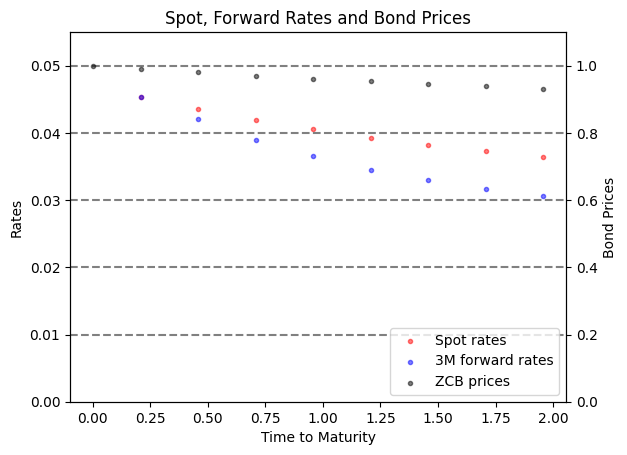

In [5]:
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T[1:], R[1:],marker = '.', label='Spot rates', alpha=0.5, color='red')
scatter2 = ax1.scatter(T[1:], f_3M[1:], marker = '.', label='3M forward rates', alpha=0.5, color='blue')
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
for i in range(1, 6):
    ax1.axhline(y=i*0.01, color='gray', linestyle='--')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p, label='ZCB prices', marker = '.', color='black', alpha=0.5)
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()

### (e) Price of 3 swaps and 5 bonds if spots dropped by 10 bps

In [6]:
# e)

# new spot rates
R_10_bps = R - 0.001*np.ones([])

print("New spot rates: \n", R_10_bps)

# new zero coupon bond prices
p_10_bps = fid.zcb_prices_from_spot_rates(T, R_10_bps)


print("New zero coupon bond prices: \n", p_10_bps)

# new prices of the bonds and swaps
pi_10_bps = np.matmul(C, p_10_bps)
print("New prices for swaps and bonds: \n", pi_10_bps)

New spot rates: 
 [       nan 0.04431828 0.04251833 0.04092989 0.03952809 0.03829101
 0.03719928 0.03623584 0.03538561]
New zero coupon bond prices: 
 [1.         0.99080952 0.98070109 0.97142423 0.96282743 0.95478576
 0.94719627 0.93997416 0.9330497 ]
New prices for swaps and bonds: 
 [  0.86973647  -1.1740026    2.22576323 103.11782696 101.94643885
 104.68023231 101.25333922 103.86602576]


In [7]:
# prices of the swaps and bonds (provided) in the answers - these do not align with answers in his code. The above are correct!
pi_given_10_bps = np.array([
    0.79112002,  # New price of Swap 1
    -1.01905877, # New price of Swap 2
    2.04216409,  # New price of Swap 3
    102.91463487, # New price of Bond 4
    101.6940268,  # New price of Bond 5
    104.36920266, # New price of Bond 6
    101.00315798, # New price of Bond 7
    103.56116735  # New price of Bond 8
])

### (f) R swap if issued today

In [ ]:
S_swap = T[2]*p[2]+0.5*p[4] # accrual factor interpretation: dollar value of one basispoint change
R_swap = ((0.25*L_3M+1)*p[1]-p[4])/S_swap # discounted cash flow of the swap
print('R_swap if issued today: \n', R_swap)

R_swap if issued today: 
 0.04469388618153483


### (g)-(h) Accrural factor and PnL of the swap

In [11]:
PnL_swap = - S_swap*(R_swap-R_1)
print(f'Accrual factor: {S_swap} and PnL of reciever swap: {PnL_swap}')

Accrual factor: 0.930234610936274 and PnL of reciever swap: 0.005866165334439804


The PnL is positive confirms that the owner of the receiver swap did indeed make money from
his position as the reciever swap is positioned to benefit from a decrease in interest rates.

### (i) Trader adding a bullet bond to the market - does this give rise to arbitrage opportunities?

Arbitrage is present if at least 1 ZCB price is negative

In [24]:
# traders offering
R_trader = 0.052
pi_trader = 100.2

# adding the bond to the cash-flow matrix
pi_ijk = np.hstack([pi,np.array([pi_trader])])
C_trader = np.array([0,0,0.5*K*R_trader,0,0.5*K*R_trader,0,0.5*K*R_trader,0,0.5*K*R_trader+K])
C_ijk = np.vstack([C,C_trader])

pi_trader_no_arbitrage = np.matmul(C_trader, p)

print(f'Fair market price of the bond offered by the trader: {pi_trader_no_arbitrage}')
print(f'Price of the bond offered by the trader: {pi_trader}')
print(f'Difference in price: {pi_trader_no_arbitrage-pi_trader}')


Fair market price of the bond offered by the trader: 103.0523385081963
Price of the bond offered by the trader: 100.2
Difference in price: 2.852338508196297


### (j) Construct a replicating portfolio and identify the arbitrage opportunity

In [ ]:
# replicating portfolio
h_rep = np.linalg.solve(C[:,1:].T, C_trader[1:]) # remoing the first column as it is today's cash flow
print(f'Replicating portfolio: \n{np.round(h_rep,8)}')

# type II arbitrage portfolio
h_arb_II = np.hstack([-h_rep,np.array([1])]) # short the replicating portfolio and buy the bond (as bond is priced under fair market value)
print(f'Type II arbitrage portfolio: \n{np.round(h_arb_II,8)}')

# cash flow of the arbitrage portfolio
C_arb_II = np.matmul(h_arb_II,C_ijk)
print(f'Cash flow of the arbitrage portfolio: \n{np.round(C_arb_II,8)}') # we see that the cash flow is zero in all periods - hence we can leverage price discrepancy today

# price of the bond in the arbitrage portfolio
pi_arb_II = np.matmul(h_arb_II,pi_ijk)
print(f'Price of the bond in the arbitrage portfolio: {pi_arb_II}') # negative price - hence we earn money today

Replicating portfolio: 
[-0.0319491   0.02555447  0.0319491   0.          0.02536585  0.96147572
  0.          0.        ]
Type II arbitrage portfolio: 
[ 0.0319491  -0.02555447 -0.0319491  -0.         -0.02536585 -0.96147572
 -0.         -0.          1.        ]
Cash flow of the arbitrage portfolio: 
[ 0. -0.  0. -0.  0.  0.  0.  0.  0.]
Price of the bond in the arbitrage portfolio: -2.852338508196297


### (k) Type I arbitrage

In [ ]:
# desired cash flow
C_march_2017_zcb = np.zeros(M)
C_march_2017_zcb[1] = 1 # the only period we want a cash flow in

# replicating portfolio of zcb to March 2017
h_march_2017_zcb = np.linalg.solve(C[:,1:].T, C_march_2017_zcb[1:].T) # remoing the first column as it is today's cash flow
h_march_2017_zcb = np.hstack([h_march_2017_zcb,0]) # adding 0 as we do not want the new bond being offered as part of the zcb miroring portfolio
print(f'Portfolio replicating the March 2017 ZCB: \n{np.round(h_march_2017_zcb,8)}')

# cash flow of the portfolio replicating the March 2017 ZCB
C_march_2017_zcb = np.matmul(h_march_2017_zcb,C_ijk)
print(f'Cash flow of the portfolio replicating the March 2017 ZCB: \n{np.round(C_march_2017_zcb,8)}')

# price of the bond in the arbitrage portfolio
pi_march_2017_zcb = np.matmul(h_march_2017_zcb,pi_ijk)
print(f'Price of the portfolio replicating the March 2017 ZCB is: {pi_march_2017_zcb}')

# finding the arbitrage portfolio
h_arb_I = - pi_arb_II/pi_march_2017_zcb*h_march_2017_zcb + h_arb_II # buying march 2017 ZCB by leveraging the type II arbitrage portfolio to get the cost now to zero (it has 0 cash flows in the future)
print(f'Type I arbitrage portfolio: \n{np.round(h_arb_I,8)}')

# cash flow of the arbitrage portfolio
C_arb_I = np.matmul(h_arb_I,C_ijk)
print(f'Cash flow of the arbitrage portfolio: \n{np.round(C_arb_I,8)}') # only positive cash flow on march 2017

# price of the bond in the arbitrage portfolio
pi_arb_I = np.matmul(h_arb_I,pi_ijk)
print(f'Price of the bond in the arbitrage portfolio: {pi_arb_I}') # 0 cost today, hence type 1 arbitrage

Portfolio replicating the March 2017 ZCB: 
[-9.89300e-05  2.46000e-06 -9.77274e-03 -0.00000e+00  0.00000e+00
  9.67375e-03  0.00000e+00  0.00000e+00  0.00000e+00]
Cash flow of the portfolio replicating the March 2017 ZCB: 
[ 0.  1.  0. -0. -0.  0.  0.  0. -0.]
Price of the portfolio replicating the March 2017 ZCB is: 0.9906031214634187
Type I arbitrage portfolio: 
[ 0.03166424 -0.02554738 -0.06008868 -0.         -0.02536585 -0.93362117
  0.          0.          1.        ]
Cash flow of the arbitrage portfolio: 
[ 0.          2.87939584  0.         -0.          0.          0.
  0.          0.          0.        ]
Price of the bond in the arbitrage portfolio: 0.0
